<h2>SVM (Support Vector Machine) - SVM dual problem from scratch</h2>

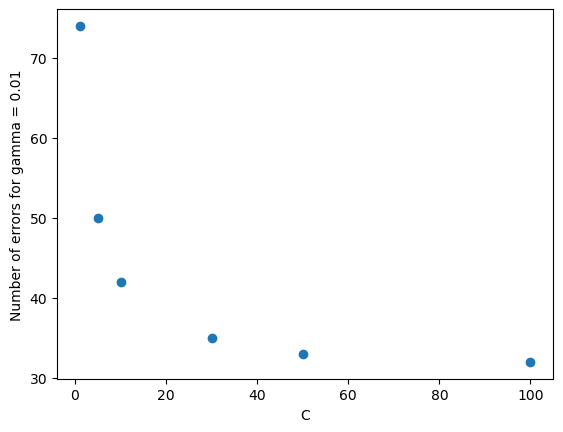

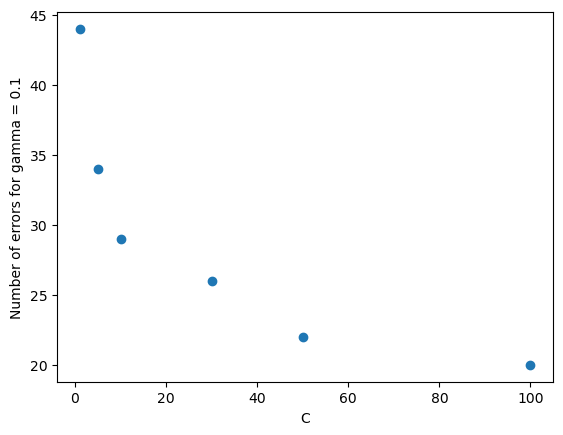

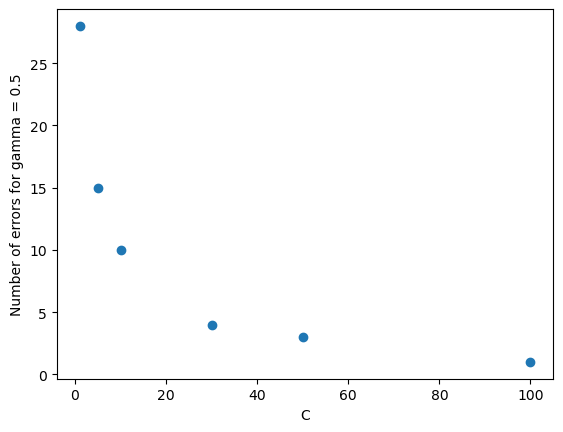

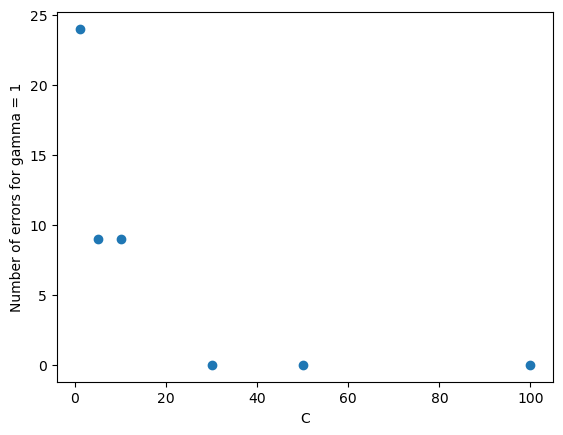

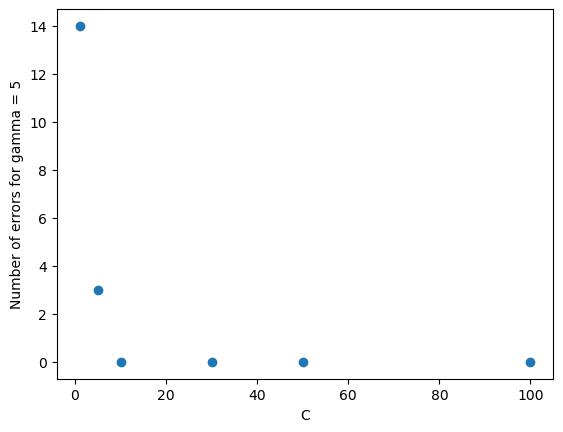

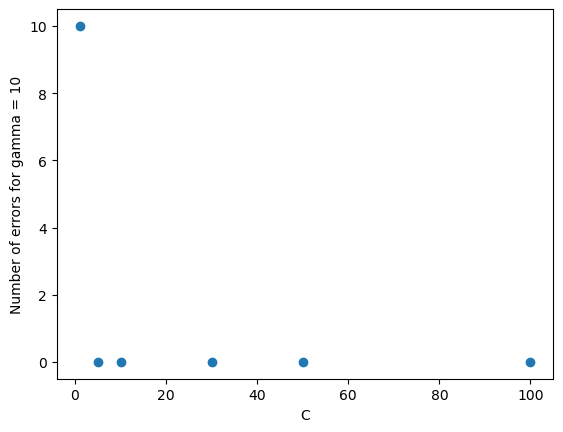

In [1]:
# load data
import numpy as np
from math import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = np.loadtxt('svmData.csv', delimiter = ',')

X = np.delete(data, 2, axis = 1) # X[i][j]
y = np.delete(data, [0, 1], axis = 1) # y[i][0] - classes -1 and +1

# standardization
sr_vr = [] # mean values vector for all features
for j in range(0, 2):
    suma = 0
    std_clan = 0
    std2 = 0
    for i in range(0, len(X)):
        suma += X[i][j]
    sr_vr.append(suma / len(X)) # mean values
    
    for k in range(0, len(X)):
        std_clan += (X[k][j] - sr_vr[j - 1]) ** 2 # calculate sum for std dev
    std2 = 1 / len(X) * std_clan # std_dev ^ 2
    
    for q in range(0, len(X)):
        X[q][j] = (X[q][j] - sr_vr[j - 1]) / sqrt(std2)
        
# calculate loss
const_C = [1, 5, 10, 30, 50, 100]
const_gamma = [0.01, 0.1, 0.5, 1, 5, 10]

br_gr = [ [ 0 for i in range(len(const_C)) ] for j in range(len(const_gamma)) ]

for i in range(0, len(const_C)):
    for j in range(0, len(const_gamma)):
        clf = SVC(C = const_C[i], kernel = 'rbf', gamma = const_gamma[j]) # rbf -> Gauss - gamma = 1/(2 * sigma ^ 2)
        clf.fit(X, y.ravel())
        
        b = clf.intercept_
        supp_vec = clf.support_vectors_
        alphas = np.abs(clf.dual_coef_)
        
        for k in range(0, len(supp_vec)):
            if(const_C[i] == alphas[0][k]):
                br_gr[i][j] = br_gr[i][j] + 1
                
    
def column(matrix, i):
    return [row[i] for row in matrix]              

for i in range(0, len(const_gamma)):
    plt.scatter(const_C, column(br_gr, i))
    plt.xlabel('C')
    plt.ylabel('Number of errors for gamma = ' + str(const_gamma[i]))
    plt.show()

In [2]:
gamma_opt = 0.5
C_opt = 50
clf = SVC(C = C_opt, kernel = 'rbf', gamma = gamma_opt) # rbf -> Gauss
clf.fit(X, y.ravel())

print('b =', clf.intercept_)
print('Indices of support vectors =', clf.support_)
print('Support vectors =', clf.support_vectors_)
print('Number of support vectors for each class =', clf.n_support_)
print('Coefficients of the support vector in the decision function =', np.abs(clf.dual_coef_))

b = [-1.00362733]
Indices of support vectors = [ 3 23 43 51 56 57 70 81  5 14 16 17 19 31 45 48]
Support vectors = [[ 0.63414756  0.54207438]
 [-1.25567272 -0.61902356]
 [-0.0565529  -0.22435655]
 [ 1.66565036 -1.71241573]
 [-1.33041598 -0.48025991]
 [-1.74067507  0.61064534]
 [-0.51945819 -1.13569458]
 [ 1.36270819 -0.6114764 ]
 [ 1.51302419  0.04136025]
 [ 0.08649298  0.31665382]
 [-0.37390013 -0.55963244]
 [-1.19529902 -0.37174601]
 [-1.75679496  1.41753388]
 [-1.60380038  0.76510782]
 [ 1.50404228 -1.01694032]
 [ 1.20912205  0.68344341]]
Number of support vectors for each class = [8 8]
Coefficients of the support vector in the decision function = [[16.25355013  6.2838461  50.         17.06323385 44.05037929 32.25425351
   9.3664915  46.53192736 17.70889482 29.58655753 40.24760143 50.
   0.0953223  28.27391271 50.          5.89139296]]


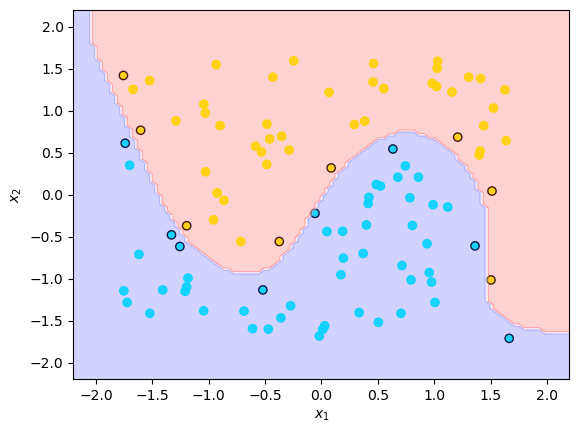

In [3]:
b = clf.intercept_
indeksi = clf.support_
supp_vec = clf.support_vectors_
alphas = np.abs(clf.dual_coef_)

boja_kruga = []
colors = []
for i in range(0, len(X)):
    for j in range(0, len(supp_vec)):
        if(np.array_equal(X[i], supp_vec[j])):
            if(y[i][0] == 1):
                colors.append('yellow')
                boja_kruga.append('black')
                break
            if(y[i][0] == -1):
                colors.append('cyan')
                boja_kruga.append('black')
                break
                
    if(len(boja_kruga) < i + 1):    
        if(y[i][0] == 1):
            colors.append('yellow')
            boja_kruga.append('yellow')

        if(y[i][0] == -1):
            boja_kruga.append('cyan')
            colors.append('cyan')

xmin = -2.2
xmax = 2.2
ymin = -2.2
ymax = 2.2

# auxiliary function for displaying decision region
def plot_decision_boundary(clf, xmin, xmax, ymin, ymax):
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, num = 100, endpoint = True), np.linspace(ymin, ymax, num = 100, endpoint = True))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha = 0.2, cmap = 'bwr')

plt.scatter(X[:, 0], X[:, 1], c = y.ravel(), alpha = 0.9, cmap = matplotlib.colors.ListedColormap(colors), edgecolors = boja_kruga)
plot_decision_boundary(clf, xmin, xmax, ymin, ymax)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = [1, 5, 10, 30, 50, 100]
gamma_range =  [0.01, 0.1, 0.5, 1, 5, 10]

param_grid = dict(gamma = gamma_range, C = C_range)
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = cv)
grid.fit(X, y.ravel())

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 5} with a score of 0.96


In [5]:
w = [0, 0]
for i in range(0, len(supp_vec)):
    proizvod = alphas[0][i] * y[indeksi[i]]
    w = np.add(w, np.multiply(proizvod, X[indeksi[i]]))

losses = []
for i in range(0, len(supp_vec)):
    gama = (np.dot(w, supp_vec[i]) + b) * y[indeksi[i]][0]
    losses.append(1 - gama)

losses

[array([23.23562235]),
 array([-36.93109185]),
 array([-5.59706505]),
 array([-1.70015808]),
 array([-35.61628563]),
 array([-21.81327708]),
 array([-32.87575051]),
 array([14.40129125]),
 array([-28.39877489]),
 array([-6.02135115]),
 array([20.50705773]),
 array([32.80446018]),
 array([7.98747631]),
 array([18.04794405]),
 array([-7.05309547]),
 array([-35.30255918])]